Redshift de equivalencia entre materia y const. cosmológica
0.326499807879
Tiempo de equivalencia entre materia y const. cosmológica en años
3574821149.77


Redshift de equivalencia entre materia y radiación
2998.0
Tiempo de equivalencia entre materia y radiación en años
59263.6899472

[4.55779705e-01 4.55645076e-01 4.55510487e-01 ... 6.74484260e-14
 6.74285029e-14 6.74085858e-14]
1658388370.123288


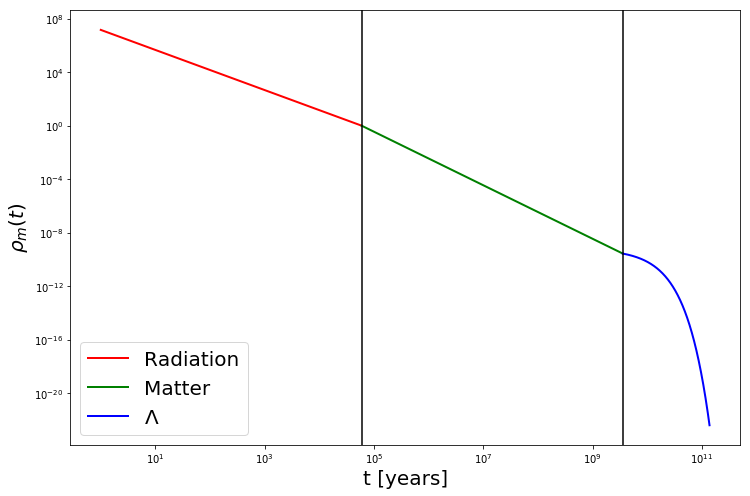

In [38]:
#Gabriel Karim Miranda Carrion        Agosto 2018

import numpy as np
import scipy.integrate as integrate #Integrador
import matplotlib.pyplot as plt #Graficador

#Este programa calcula la densidad de materia en función del tiempo de z=0 a z=10000.

Omega_m = 0.2999 #Densidad de materia oscura
Omega_L = 0.7 #Densidad de const. cosmológica 
Omega_r = 0.0001
h = 0.7 #Parámetro de Hubble
H_0 = 100.0*h #Constante de Hubble en km/s/Mpc
c = 299792.458 #Velocidad de la luz en km/s
t_0 =  13798.0*10.0**7. #Edad del Universo en años

"""Equivalencia de densidad de materia y densidad de const. cosmológica"""

a_eq1 = (Omega_m/Omega_L)**(1./3)
z_eq1 = (1.0-a_eq1)/a_eq1

f1 = z_eq1/a_eq1  #Factor de equivalencia entre materia y const. cosmológica

def F1(x): #Está función es el integrando 
    
 return 3*10**19/(Ho*(1.+x)*np.sqrt(Omega_L + Omega_m*(1.+x)**3)) 

t_eq1, err = integrate.quad(F1, 0, z_eq1)

print "Redshift de equivalencia entre materia y const. cosmológica"
print z_eq1
print "Tiempo de equivalencia entre materia y const. cosmológica en años" 
t_ML = t_eq1/(3.14*10**7) #Pasar a unidades de años
print t_ML
print "" 

print "" 

"""Equivalencia de densidad de materia y densidad de radiacion"""

a_eq2 = (Omega_r/Omega_m)
z_eq2 = (1.0-a_eq2)/a_eq2

def F2(x): #Está función es el integrando 

 return 3*10**19/(H_0*(1.+x)*np.sqrt(Omega_r*(1.+x)**4 + Omega_m*(1.+x)**3)) 

t_eq2, err = integrate.quad(F2,z_eq2,np.inf)

f2 = z_eq2/a_eq2  #Factor de equivalencia entre materia y radiación

print "Redshift de equivalencia entre materia y radiación" 
print z_eq2
print "Tiempo de equivalencia entre materia y radiación en años" 
t_MR = t_eq2/(3.14*10**7) #Pasar a unidades de años
print t_MR
print "" 

C = (3.14*10**7.)/(3.*10**19)  #Conversión  

def a_r(t): #Está función es el factor de escala en dominación de radiación
 return (t/t_MR)**(1./2)

def a_m(t): #Está función es el factor de escala en dominación de materia
 return (t/t_MR)**(2./3)

def a_L(t): #Está función es el factor de escala en dominación de const. cosmológica
 return np.exp(H_0*C*t)
# return np.exp((t)*(Ho*)

def rho1_m(t): #Está función es la densidad de materia / densidad de materia al día de hoy 
 return 1./(a_r(t))**(3.)

def rho2_m(t): #Está función es la densidad de materia / densidad de materia al día de hoy
 return 1./(a_m(t))**(3.)  

def rho3_m(t): #Está función es la densidad de materia / densidad de materia al día de hoy 
 return 1./(a_L(t))**(3.)
  
size_arr = 100000 #Tamaño del arreglo (# de puntos)

N1 = np.linspace(1.0, t_MR , size_arr) #Intervalo de integración del tiempo para radiación
N2 = np.linspace(t_MR, t_ML, size_arr) #Intervalo de integración del tiempo para materia 
N3 = np.linspace(t_ML, t_0, size_arr) #Intervalo de integración del tiempo para const. cosmológica

rho1_m = np.vectorize(rho1_m) #Convierte la función de densidad de materia en un vector
rho1_arr = (rho1_m(N1)) # Vector de densidad de materia

rho2_m = np.vectorize(rho2_m) #Convierte la función de densidad de materia en un vector
rho2_arr = (rho2_m(N2)) # Vector de densidad de materia

rho3_m = np.vectorize(rho3_m) #Convierte la función de densidad de materia en un vector
rho3_arr = (rho3_m(N3)) # Vector de densidad de materia

print rho3_arr

ratio = rho3_arr[0]/rho2_arr[-1]   #Pegar las gráficas de materia y const. cosmológicas

print ratio 

plt.figure(figsize = (12,8))     # Indica el tamaño de la grafica (x,y) 
plt.plot(N1, rho1_arr , linestyle='-' , linewidth=2., color='r', label= 'Radiation') # label will be use by plt.legend()
plt.plot(N2, rho2_arr , linestyle='-' , linewidth=2., color='g', label= 'Matter') # label will be use by plt.legend()
plt.plot(N3, rho3_arr/ratio , linestyle='-' , linewidth=2., color='b', label=r'$\Lambda$') # label will be use by plt.legend()
plt.axvline(x=3574821149.77, color='black', linestyle='-')
plt.axvline(x=59263.6899472, color='black', linestyle='-')
plt.xlabel('t [years]',fontsize=20)
plt.ylabel(r'$\rho_m(t)$',fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20, loc=3)
plt.show()
